## Quiz Evaluasi Materi Basic Python Programming

In [156]:
# Python version check
import platform
print(platform.python_version())

3.6.4


### Library

In [157]:
import pandas as pd
import numpy as np

### Dataset

**Original data source** : https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

**Summary**  
Dataset contains daily count of rental bikes between years 2011 in Capital bikeshare system with the corresponding weather and seasonal information, provided in two separated table (bike and weather).Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.User is able to easily rent a bike from a particular position and return back at another position.

**Dictionary 'weather'**  
datetime = date (format dd-mm-yy)  
season = musim (Spring, Summer, Fall, Winter)  
weather = cuaca (Clear, Cloudy, Light Snow)  
temp = temperature, degC  
hum = humidity, %  
windspeed = kecepatan angin, km/h  

**Dictionary 'bike'**  
datetime = date (format dd-mm-yy)  
casual = banyaknya bikesharing casual-user (non-member)  
registered = banyaknya bikesharing casual-user (member)

### Data Import & Quicklook

In [158]:
bike = pd.read_csv("D:/bike.csv")
weather = pd.read_csv("D:/weather.csv")

In [159]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
date          365 non-null object
casual        365 non-null int64
registered    365 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.6+ KB


In [160]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
date         365 non-null object
season       365 non-null object
weather      365 non-null object
temp         365 non-null float64
hum          365 non-null float64
windspeed    365 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.2+ KB


In [161]:
bike.head(3)

,date,casual,registered
0,01-01-11,331,654
1,02-01-11,131,670
2,03-01-11,120,1229


In [162]:
weather.head(3)

,date,season,weather,temp,hum,windspeed
0,01-01-11,Spring,Cloudy,34.4167,80.5833,10.749882
1,02-01-11,Spring,Cloudy,36.3478,69.6087,16.652113
2,03-01-11,Spring,Clear,19.6364,43.7273,16.636703


## Part 1

1.Tambahkan 1 kolom baru pada tabel 'bike' dengan nama kolom 'total', berisi jumlah casual-user dan registered-user

In [163]:
# Answer 1
bike['total']=bike['casual']+bike['registered']
bike.head()

,date,casual,registered,total
0,01-01-11,331,654,985
1,02-01-11,131,670,801
2,03-01-11,120,1229,1349
3,04-01-11,108,1454,1562
4,05-01-11,82,1518,1600


2.Tambahkan 1 kolom baru pada tabel 'weather' dengan nama kolom 'day' yang berisi nama hari berdasarkan tanggal pada kolom 'date'. Clue: Cara seperti exercise data 'pet' pada materi Python Programming 2 

In [164]:
# Answer 2
import datetime as dt
weather["date"]=pd.to_datetime(weather["date"])
weather['day']=weather['date'].dt.weekday_name
weather.head()

,date,season,weather,temp,hum,windspeed,day
0,2011-01-01,Spring,Cloudy,34.4167,80.5833,10.749882,Saturday
1,2011-02-01,Spring,Cloudy,36.3478,69.6087,16.652113,Tuesday
2,2011-03-01,Spring,Clear,19.6364,43.7273,16.636703,Tuesday
3,2011-04-01,Spring,Clear,20.0000,59.0435,10.739832,Friday
4,2011-05-01,Spring,Clear,22.6957,43.6957,12.522300,Sunday


3.Lakukan konversi unit temperature dari degC menjadi degF. Gunakan fungsi lambda

In [165]:
# Answer 3
weather['temp']=list(map(lambda x:((x*9/5)+32),weather['temp']))
weather.head()


,date,season,weather,temp,hum,windspeed,day
0,2011-01-01,Spring,Cloudy,93.95006,80.5833,10.749882,Saturday
1,2011-02-01,Spring,Cloudy,97.42604,69.6087,16.652113,Tuesday
2,2011-03-01,Spring,Clear,67.34552,43.7273,16.636703,Tuesday
3,2011-04-01,Spring,Clear,68.00000,59.0435,10.739832,Friday
4,2011-05-01,Spring,Clear,72.85226,43.6957,12.522300,Sunday


4.Gabungkan data 'weather' dan data 'bike' berdasar tanggal yang bersesuaian

In [166]:
# Answer 4
bike["date"]=pd.to_datetime(bike["date"])
gabungan=pd.merge(bike,weather,how='outer',on='date')
gabungan.head()

,date,casual,registered,total,season,weather,temp,hum,windspeed,day
0,2011-01-01,331,654,985,Spring,Cloudy,93.95006,80.5833,10.749882,Saturday
1,2011-02-01,131,670,801,Spring,Cloudy,97.42604,69.6087,16.652113,Tuesday
2,2011-03-01,120,1229,1349,Spring,Clear,67.34552,43.7273,16.636703,Tuesday
3,2011-04-01,108,1454,1562,Spring,Clear,68.00000,59.0435,10.739832,Friday
4,2011-05-01,82,1518,1600,Spring,Clear,72.85226,43.6957,12.522300,Sunday


5.Pada musim dan cuaca apa bikesharing a)Paling banyak digunakan, b)Paling sedikit digunakan

In [167]:
# Answer 5
a=gabungan.groupby(['weather','season']).sum()[['total']].sort_values(by='total',ascending=False)
print(a.head(1))
print(a.tail(1))

                 total
weather season        
Clear   Fall    309150
                   total
weather    season       
Light Snow Spring   1129


6.Tampilkan informasi nilai maximum dan nilai minimum dari variable 'temp', 'hum' dan 'winspeed' untuk setiap kategori musim

In [168]:
# Answer 6
maks=gabungan.groupby('season')['temp','hum','windspeed'].max().transpose()
mins=gabungan.groupby('season')['temp','hum','windspeed'].min().transpose()
print(maks)
print(mins)

season           Fall      Spring      Summer      Winter
temp       184.850060  129.200000  177.499940  148.850060
hum         93.956500   94.826100   92.250000   97.250000
windspeed   25.166339   34.000021   26.000489   28.292425
season           Fall     Spring     Summer     Winter
temp       116.450060  42.643472  77.547740  71.749940
hum         39.625000   0.000000  30.217400  41.000000
windspeed    5.459106   3.042356   5.000712   1.500244


7.Buat plot untuk memvisualisasikan hubungan antara temp (unit degF) dengan total pengguna bikesharing. Customize plot dengan ukuran, judul, pilihan warna, label yang sesuai agar lebih informatif. 

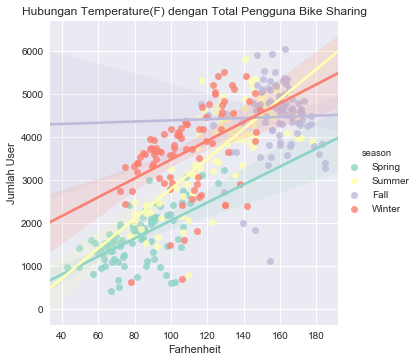

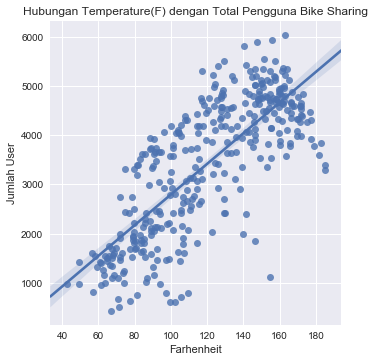

In [173]:
# Answer 7
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='temp', y='total', data=gabungan, hue='season',palette='Set3').set(xlabel='Farhenheit', ylabel='Jumlah User')
sns.set(rc={'figure.figsize':(20,20)})
plt.title('Hubungan Temperature(F) dengan Total Pengguna Bike Sharing')
plt.show()

sns.lmplot(x='temp', y='total', data=gabungan,palette='Set3').set(xlabel='Farhenheit', ylabel='Jumlah User')
sns.set(rc={'figure.figsize':(20,20)})
plt.title('Hubungan Temperature(F) dengan Total Pengguna Bike Sharing')
plt.show()

8.Tampilkan dengan grafik (barplot) jumlah pengguna bikesharing untuk setiap kategori musim. Urutkan dari kiri ke kanan mulai dari frekuensi tertinggi.

In [170]:
# Answer 8
group=gabungan.groupby('season').sum()
sort=group.sort_values(by='total',ascending=False)
sort['total']

season
Fall      419650
Summer    347316
Winter    326137
Spring    150000
Name: total, dtype: int64

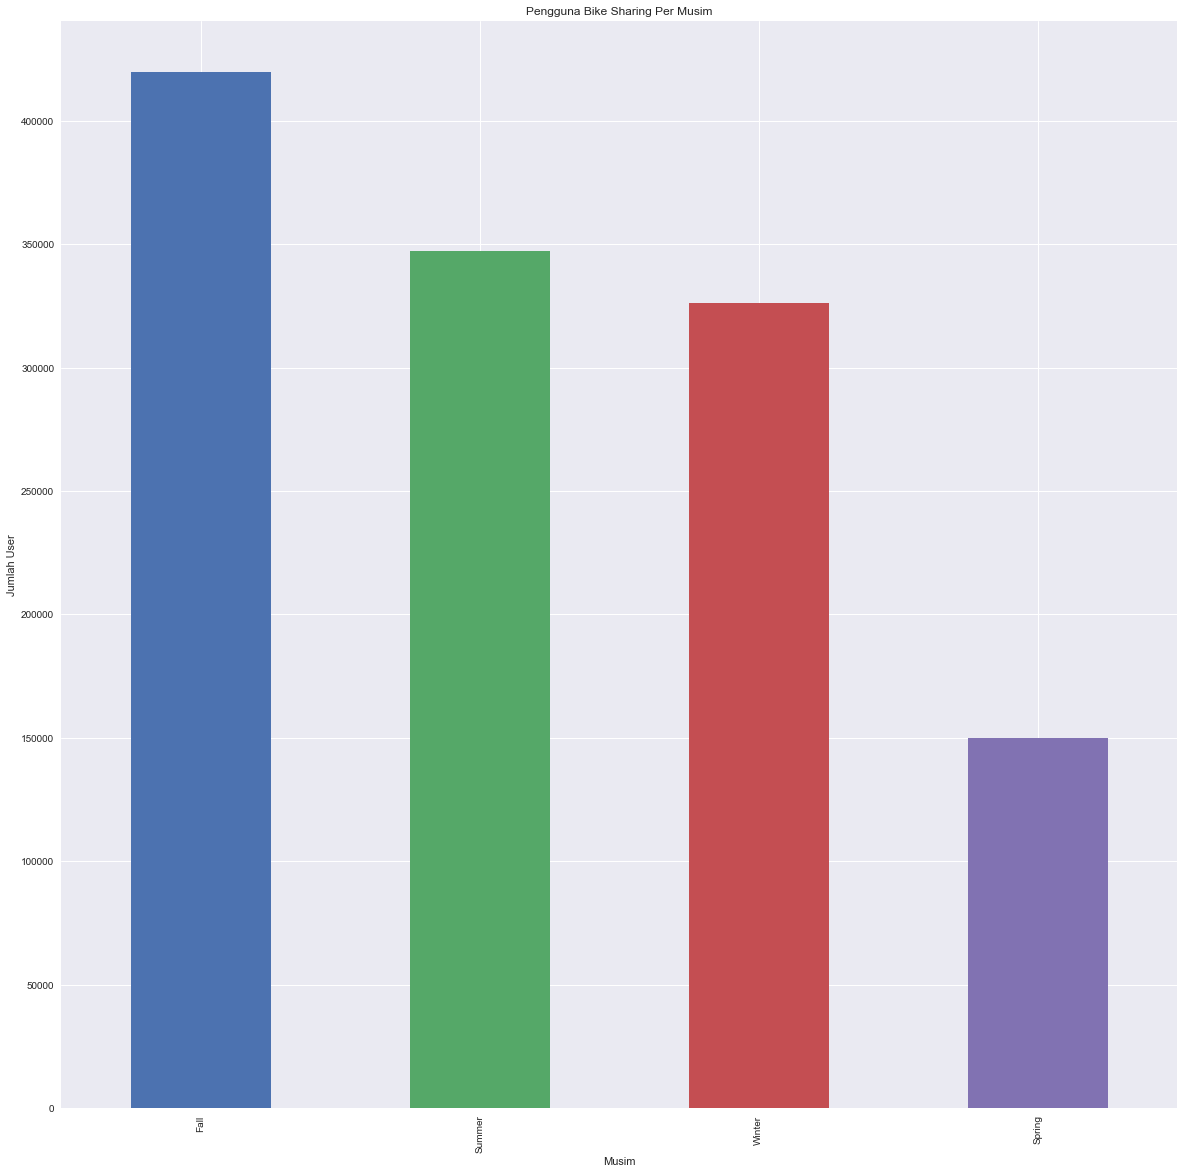

In [171]:
sort['total'].plot.bar(title='Pengguna Bike Sharing Per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah User')
plt.show()

9.Cara untuk menampilkan histogram dari data pandas menggunakan matplotlib adalah 
  
a.	plt.histogram(x,bins = 15)  
b.	plt.bucket(x,bins = 15)  
c.	plt.hist(x,bins = 15)  
d.	plt.bar(x,bins = 15)  
e.	plt.his(x,bins = 15)  


# Answer 9
c

10.Cara untuk menampilkan scatterplot dan garis regresi menggunakan seaborn adalah  
  
a.	sns.regression  
b.	sns.lmplot  
c.	sns.linearregression  
d.	sns.scatterplot  
e.	sns.lmreg  


# Answer 10
b

11.Kota tempat tinggal pemain sepak bola merupakan tipe variable  
  
a.	Rating  
b.	Ratio  
c.	Nominal  
d.	Continuous  
e.	Ordinal


# Answer 11
c

12.Untuk menempatkan label atau tulisan atau tanda panah dalam visualisasi dapat menggunakan method  
  
a.	Legend  
b.	Arrow  
c.	Label  
d.	Text  
e.	Annotate


# Answer 12
E

13.Yang termasuk dalam style yang dapat digunakan dalam matplotlib  
  
a.	gplot  
b.	blackandwhite  
c.	sephia  
d.	gray  
e.	ggplot  


# Answer 13
e

## Part 2

1.Jelaskan perbedaan dari exploratory dan explanatory dari sisi visualisasi

[answer 1] exploratory adalah proses mengolah data data yang digunakan, untuk menghasilkan informasi-informasi yang sebelumnya tidak tampak pada data, exploratory dilakukan hanya sampai tahap data scientist sehingga dalam exploratory bisanya dilakukan visualisasi yang user belum tentu paham

explanatory adalah proses untuk menyampaikan insight hasil dari exploratoryq kepada client natau user, dalam tahap ini visualisasi data yang ditampilkan sudah berbeda dari tahap exploratory sehingga user atau ,client yang awam dengan pengolahan data statistik mengerti dan paham terhadap insight yang dihasilkan

2.Jelaskan factor apa saja yang perlu dipertimbangkan dalam memilih visualisasi atau plot apa yang ingin ditampilkan dalam tahap exploration

[answer 2] 
1. Plot dibuat harus sesuai dengan data yang diolah (data kategorik bisa menggunakan bar chart, sedangkan numeric bisa mengunakan histogram)
2. plot dibuat sesuai kebutuhan
3. menggunakan pemikiran awal mengenai variabel a berhubungan dengan b (meskipun hanya hipotesis)


3.Buat 1 grafik Time series yang menampilkan banyaknya pengguna bikesharing dari 1-Jan-2011 sampai 31-Des-2011. Ingin diketahui juga komposisi banyaknya casual-user dan registered user. Clue: 1)Gunakan data 'casual' dan 'registered', bukan data 'total. 2)Opsi menggunakan area plot

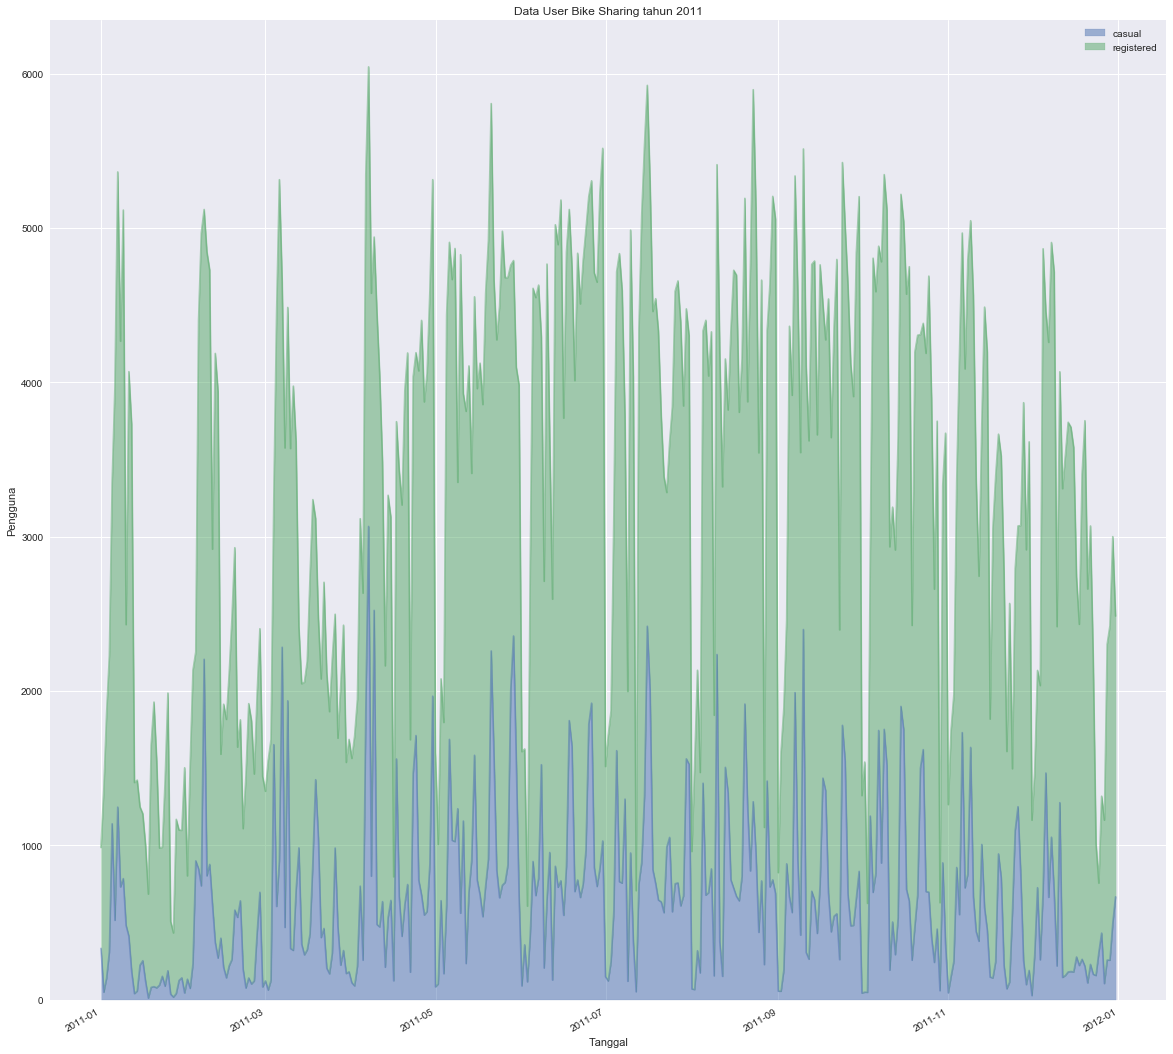

In [172]:
# answer 3
gabungan.set_index('date',inplace=True)
gabungan[['casual','registered']].plot.area(alpha=0.5,title= "Data User Bike Sharing tahun 2011",figsize=(20,20))
plt.ylabel('Pengguna')
plt.xlabel('Tanggal')
plt.show()
                                            